# **Machine Learning for number of Passenger Prediction in KSA** 🚅

---



## Import Libraries

In [206]:
!pip install arabic-reshaper
!pip install python-bidi

In [207]:
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


## Load the Data

In [208]:
df = pd.read_csv('The total number of passengers and public transport trips within cities by year, region, city and station.xlsx.CSV')

This data set from "Open Data Platform", let's explore the data

In [209]:
df.head()

,مجمل عدد ركاب ورحلات النقل العام داخل المدن حسب السنه والمنطقة والمدينة والمحطة,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,السنة,الشهر,المنطقة,المدينة,المسار,اسم الخط,عدد الرحلات,عدد الركاب
1,2018,January,Riyadh,Riyadh,7,مستشفى الجامعي,1554,36809
2,NaN,NaN,Riyadh,Riyadh,8,مدرسة دلة,4224,136039
3,NaN,NaN,Riyadh,Riyadh,9,أسواق الشمال,264,7639
4,NaN,NaN,Riyadh,Riyadh,10,حي الروضة,1110,7366


In [210]:
# Set the values from row 0 as the new index
df.columns = df.iloc[0]
df = df.drop(0)
df = df.reset_index(drop=True)

In [211]:
df.head()

,السنة,الشهر,المنطقة,المدينة,المسار,اسم الخط,عدد الرحلات,عدد الركاب
0,2018,January,Riyadh,Riyadh,7,مستشفى الجامعي,1554,36809
1,NaN,NaN,Riyadh,Riyadh,8,مدرسة دلة,4224,136039
2,NaN,NaN,Riyadh,Riyadh,9,أسواق الشمال,264,7639
3,NaN,NaN,Riyadh,Riyadh,10,حي الروضة,1110,7366
4,NaN,NaN,Riyadh,Riyadh,16,كبري جدة,1110,8665


In [212]:
df.tail()

,السنة,الشهر,المنطقة,المدينة,المسار,اسم الخط,عدد الرحلات,عدد الركاب
378,NaN,NaN,Riyadh,Riyadh,8,مدرسة دلة,3609,52190
379,NaN,NaN,Riyadh,Riyadh,9,أسواق الشمال,3871,93160
380,NaN,NaN,Riyadh,Riyadh,10,حي الروضة,2250,36539
381,NaN,NaN,Riyadh,Riyadh,16,كبري جدة,3708,59038
382,NaN,NaN,Riyadh,Riyadh,17,المدينة الصناعية,1788,56480


In [213]:
df.describe()

,السنة,الشهر,المنطقة,المدينة,المسار,اسم الخط,عدد الرحلات,عدد الركاب
count,63,63,378,378,378,378,378,378
unique,6,12,1,1,6,6,304,367
top,2018,January,Riyadh,Riyadh,7,مستشفى الجامعي,3875,0
freq,12,6,378,378,63,63,16,12


# EDA (Exploratory Data Analysis)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   السنة         63 non-null     object
 1   الشهر         63 non-null     object
 2   المنطقة       378 non-null    object
 3   المدينة       378 non-null    object
 4   المسار        378 non-null    object
 5   اسم الخط      378 non-null    object
 6   عدد الرحلات   378 non-null    object
 7   عدد الركاب    378 non-null    object
dtypes: object(8)
memory usage: 24.1+ KB


In [215]:
# get the columns
df.columns

Index(['السنة ', 'الشهر', 'المنطقة ', 'المدينة ', 'المسار', 'اسم الخط',
       'عدد الرحلات ', 'عدد الركاب '],
      dtype='object', name=0)

In [216]:
#Check for duplicate rows
df.duplicated().sum()

9

In [217]:
#remove duplication
df = df.drop_duplicates()

In [218]:
#Check for duplicate rows
df.duplicated().sum()

0

In [219]:
#check the null (missing values)
df.isnull().sum()

0
السنة           311
الشهر           311
المنطقة           1
المدينة           1
المسار            1
اسم الخط          1
عدد الرحلات       1
عدد الركاب        1
dtype: int64

In [220]:
# Fill null values with the previous non-null values
df = df.fillna(method='ffill')

In [221]:
df.isnull().sum()

0
السنة           0
الشهر           0
المنطقة         0
المدينة         0
المسار          0
اسم الخط        0
عدد الرحلات     0
عدد الركاب      0
dtype: int64

In [222]:
# Convert the columns to numeric data types using integer index positions
df.iloc[:, 0] = df.iloc[:, 0].astype(int)
df.iloc[:, 4] = df.iloc[:, 4].astype(int)
df.iloc[:, 6] = df.iloc[:, 6].astype(int)
df.iloc[:, 7] = df.iloc[:, 7].astype(float)

In [223]:
# Print the updated data types
df.dtypes

0
السنة             int64
الشهر            object
المنطقة          object
المدينة          object
المسار            int64
اسم الخط         object
عدد الرحلات       int64
عدد الركاب      float64
dtype: object

In [224]:
#check the class column values
unique_values1 = df['المدينة '].unique()
print(unique_values1)

unique_values2 = df['اسم الخط'].unique()
print(unique_values2)

unique_values3 = df['السنة '].unique()
print(unique_values3)

['Riyadh']
['مستشفى  الجامعي' 'مدرسة دلة' 'أسواق الشمال' 'حي الروضة ' ' كبري جدة '
 'المدينة الصناعية ']
[2018 2019 2020 2021 2022 2023]


In [226]:
#saving the new dataframe into a csv file
df.to_csv('M2.csv')

# Data Visualization

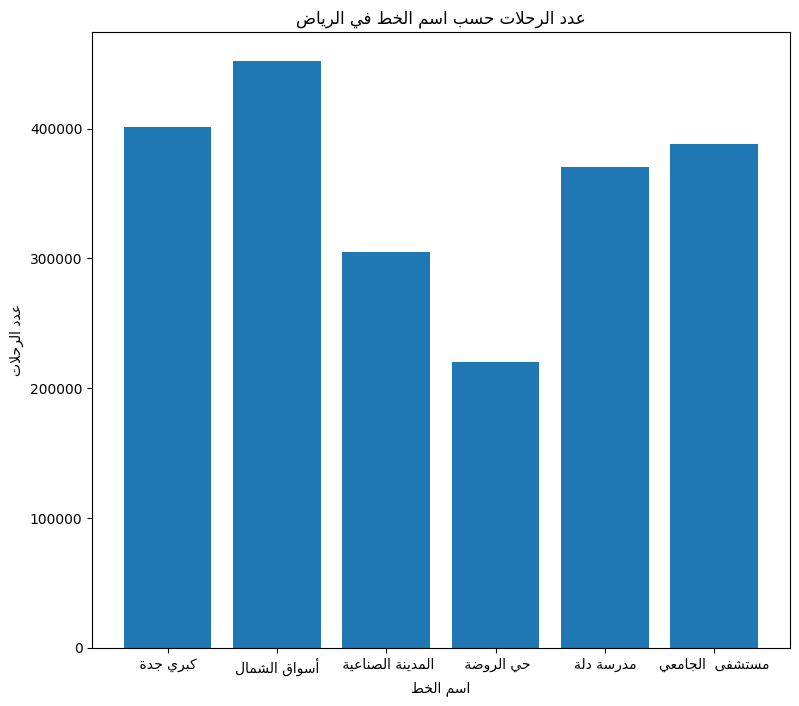

In [227]:
# Filter the data for trips in Riyadh
df_riyadh = df[df['المدينة '] == 'Riyadh']

# Group the data by route name and calculate the sum of trips for each route
trips_by_route = df_riyadh.groupby('اسم الخط')['عدد الرحلات '].sum()

# Reshape and convert Arabic labels for correct display
reshaped_routes = [get_display(arabic_reshaper.reshape(route)) for route in trips_by_route.index]

# Create the bar plot
plt.figure(figsize=(9, 8))
plt.bar(reshaped_routes, trips_by_route)
plt.xlabel(get_display(arabic_reshaper.reshape('اسم الخط')))
plt.ylabel(get_display(arabic_reshaper.reshape('عدد الرحلات')))
plt.title(get_display(arabic_reshaper.reshape('عدد الرحلات حسب اسم الخط في الرياض')))
plt.show()

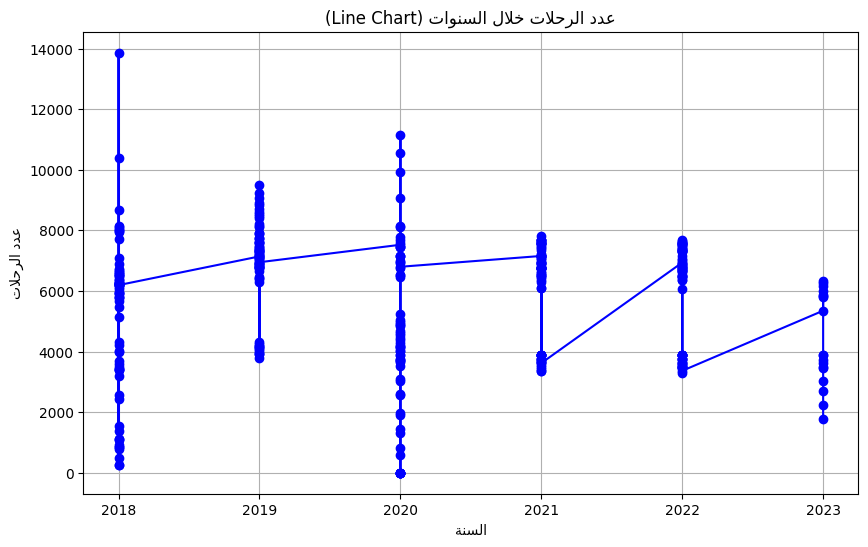

In [228]:
# Line Chart
# Reshape Arabic labels
reshaped_labels = [get_display(arabic_reshaper.reshape(str(label))) for label in df['السنة ']]

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(reshaped_labels, df['عدد الرحلات '], marker='o', linestyle='-', color='blue')
plt.xlabel(get_display(arabic_reshaper.reshape('السنة')))
plt.ylabel(get_display(arabic_reshaper.reshape('عدد الرحلات')))
plt.title(get_display(arabic_reshaper.reshape('عدد الرحلات خلال السنوات (Line Chart)')))
plt.grid(True)
plt.show()

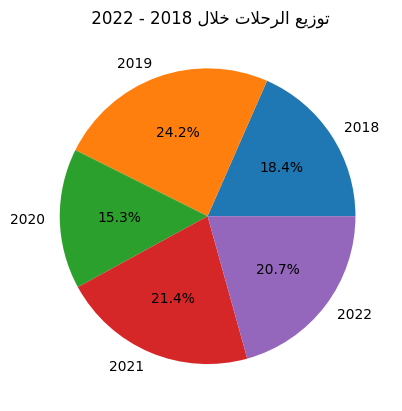

In [229]:
# Filter the DataFrame for the years 2018 to 2022
df_2018_to_2022 = df[(df['السنة '] >= 2018) & (df['السنة '] <= 2022)]

# Group the data by month and calculate the sum of trips
trips_by_year = df_2018_to_2022.groupby('السنة ')['عدد الرحلات '].sum()

# Reshape and convert Arabic labels for correct display
reshaped_Years = [get_display(arabic_reshaper.reshape(str(year))) for year in trips_by_year.index]

# Create the pie chart
plt.pie(trips_by_year.values, labels=reshaped_Years, autopct='%1.1f%%')
plt.title(get_display(arabic_reshaper.reshape('توزيع الرحلات خلال 2018 - 2022 ')))
plt.show()

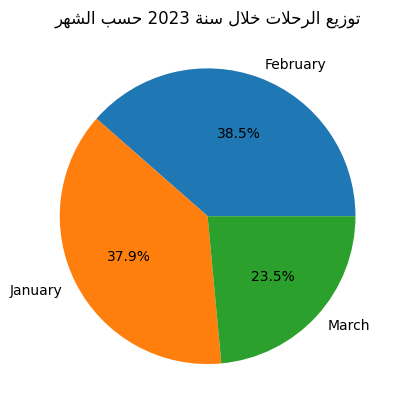

In [230]:
# Filter the DataFrame for the year 2023
df_2023 = df[df['السنة '] == 2023]

# Group the data by month and calculate the sum of trips
trips_by_month = df_2023.groupby('الشهر')['عدد الرحلات '].sum()

# Reshape and convert Arabic labels for correct display
reshaped_months = [get_display(arabic_reshaper.reshape(str(month))) for month in trips_by_month.index]

# Create the pie chart
plt.pie(trips_by_month.values, labels=reshaped_months, autopct='%1.1f%%')
plt.title(get_display(arabic_reshaper.reshape('توزيع الرحلات خلال سنة 2023 حسب الشهر')))
plt.show()

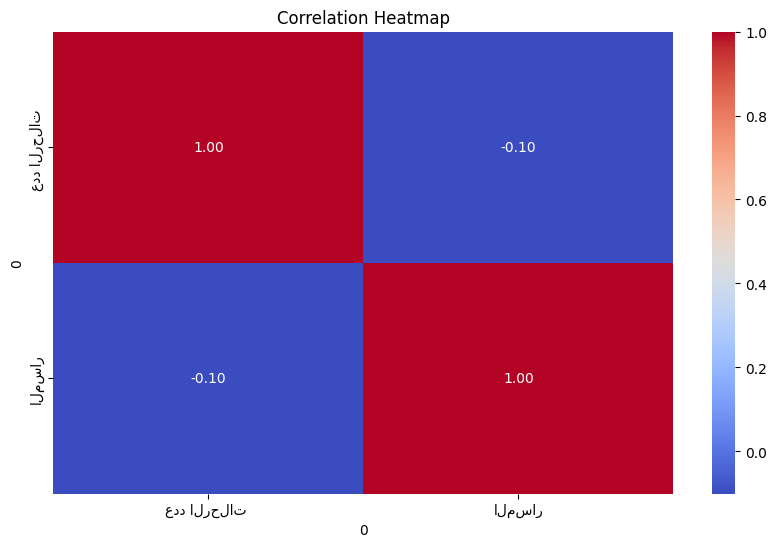

In [231]:
# Heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(df[['عدد الرحلات ','المسار']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

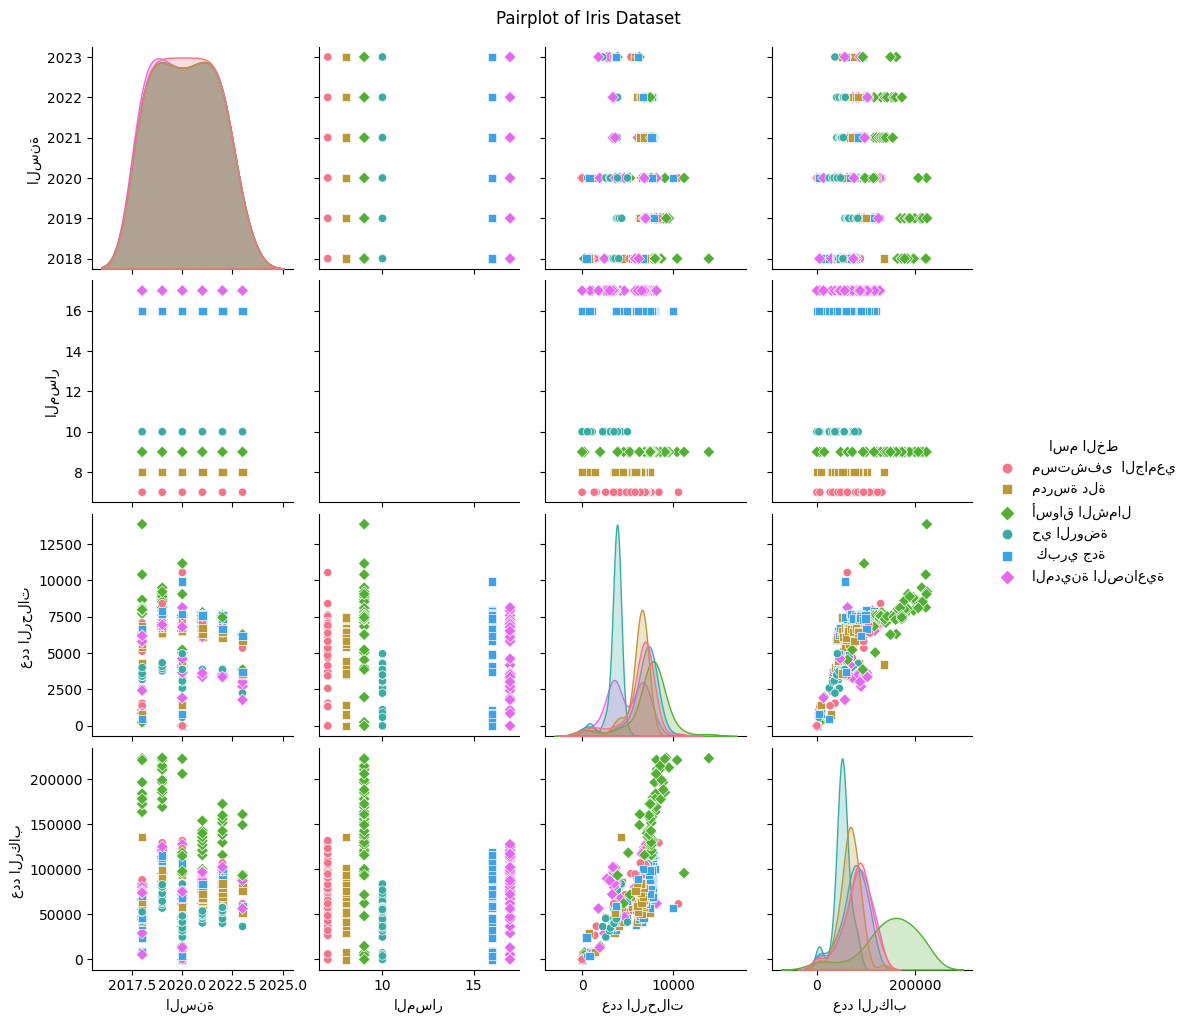

In [232]:
# Pairplot: Scatterplot matrix
sns.pairplot(df, hue='اسم الخط', palette="husl", markers=["o", "s", "D"])
plt.suptitle(get_display("Pairplot of Iris Dataset"), y=1.02)
plt.show()

# Data Processing

In [233]:
# Select the columns for normalization
columns_to_normalize = ['عدد الرحلات ', 'عدد الركاب ']

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.head()

,السنة,الشهر,المنطقة,المدينة,المسار,اسم الخط,عدد الرحلات,عدد الركاب
0,2018,January,Riyadh,Riyadh,7,مستشفى الجامعي,-1.909604,-1.045692
1,2018,January,Riyadh,Riyadh,8,مدرسة دلة,-0.684440,1.186079
2,2018,January,Riyadh,Riyadh,9,أسواق الشمال,-2.501537,-1.701752
3,2018,January,Riyadh,Riyadh,10,حي الروضة,-2.113339,-1.707892
4,2018,January,Riyadh,Riyadh,16,كبري جدة,-2.113339,-1.678676


In [234]:
# Scaling to a specific range [0, 1] using MinMaxScaler
min_max_scaler = MinMaxScaler()
df[columns_to_normalize] = min_max_scaler.fit_transform(df[columns_to_normalize])
df.head()

,السنة,الشهر,المنطقة,المدينة,المسار,اسم الخط,عدد الرحلات,عدد الركاب
0,2018,January,Riyadh,Riyadh,7,مستشفى الجامعي,0.112097,0.164655
1,2018,January,Riyadh,Riyadh,8,مدرسة دلة,0.304696,0.608534
2,2018,January,Riyadh,Riyadh,9,أسواق الشمال,0.019043,0.034171
3,2018,January,Riyadh,Riyadh,10,حي الروضة,0.080069,0.032950
4,2018,January,Riyadh,Riyadh,16,كبري جدة,0.080069,0.038761


In [235]:
# Encoding categorical variables
categorical_cols = ['المنطقة ', 'المدينة ', 'اسم الخط','الشهر']
data_encoded = pd.get_dummies(df, columns=categorical_cols)

# ML Model

### Splitting the dataset into Train and Test sets

In [236]:
# Split the data into training and testing sets
X = data_encoded.drop('عدد الركاب ', axis=1)  # Features excluding the target variable
y = data_encoded['عدد الركاب ']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Model

In [240]:
model = xgb.XGBRegressor()

### Training the Model

In [241]:
# Train an XGBoost regression model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Evaluating the Model

In [242]:
print(model.feature_importances_)

[0.01618174 0.00972685 0.06083191 0.         0.         0.00784212
 0.74861145 0.         0.0509675  0.02605875 0.         0.00694875
 0.00192001 0.00483641 0.00596557 0.01662694 0.00163799 0.00358537
 0.01345378 0.00301661 0.0037518  0.01469543 0.00334093]


### Predictions vs. Real Values

In [246]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [247]:
# Print actual and predicted values
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_results)

       Actual  Predicted
337  0.241335   0.231578
33   0.188864   0.204960
15   0.195950   0.199297
333  0.452637   0.413418
57   0.261774   0.258535
..        ...        ...
94   0.305168   0.230786
201  0.231132   0.372487
320  0.391560   0.393103
300  0.517660   0.624732
381  0.264091   0.304492

[75 rows x 2 columns]


In [251]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Root Mean Squared Error: 0.06764569646382922
Mean Absolute Error: 0.044448986301478206
R-squared: 0.8661035883020654


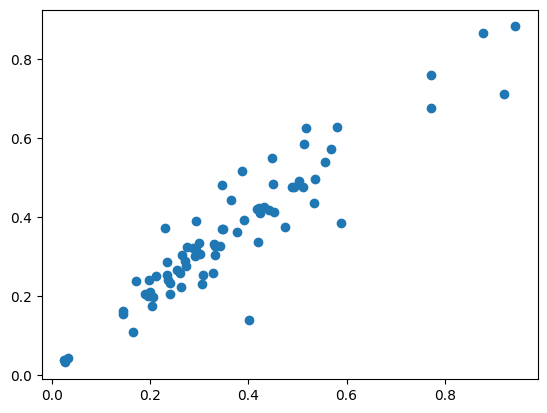

In [249]:
plt.scatter(y_test,y_pred)

<Axes: xlabel='عدد الركاب ', ylabel='Density'>

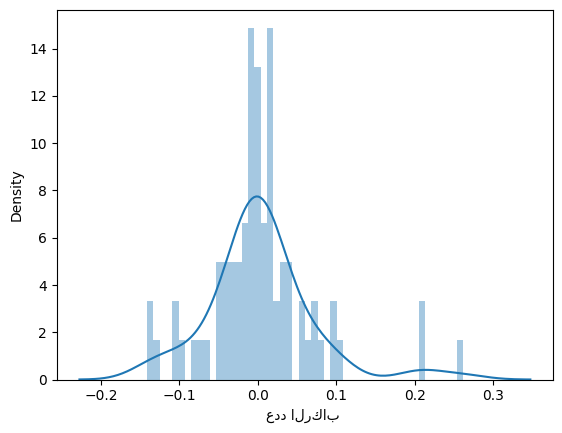

In [250]:
sns.distplot((y_test-y_pred),bins=50)

By Majd Alotaibi